In [4]:

import gc
gc.collect()
# install tensorflow 2.4.1
#install librosa

import tfcgan as tfg
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from datetime import datetime
from matplotlib import colors


dirc = "/Users/rezad.d.esfahani/Desktop/Work/Codes/Projects/TFCGAN/model/Generator_Model"


Model =  tfg.TFCGAN(dirc, scalemin = -10,
                    scalemax = 2.5485036, pwr = 1,
                    noise = 100, mtype = 0)

mode  =  "ADMM"

di = 1
rho = 1e-3
eps=1e-3
ab = 2

ds = 1


dirc  =  "/home/reza/Desktop/dd/NN/generator2_EE_24_July"
#dirc  =  "/home/reza/Desktop/dd/NN/generator2_EE_13_Aug"

#dirc  =  "/home/reza/Desktop/dd/NN/generator2_EE"

Model =  tfg.TFCGAN(dirc, scalemin = -8
                    , scalemax = 2.5485036, pwr = 1, noise = 100, mtype = 0)



In [31]:
mag = [4, 4.5, 5, 5.5, 6, 6.5, 7]
Distance = [35, 40,45, 50, 55, 60, 65, 70, 75,  80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130]
vs30 = [250,300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 800, 950]


address2 = "/home/reza/Desktop/dd/NN/binmaker2/"
#address2 = "/home/reza/Desktop/dd/NN/binmakerEpi/binmakerEpi/"


def readerbin(mag, dis, vs30):
    
     meta = np.load(address2 + "M_" + str(mag) +"_"+str(dis)+"_"+str(vs30) + ".npy")
     
     data = np.load(address2 + "D_" + str(mag) +"_"+str(dis)+"_"+str(vs30) + ".npy")
     
     return meta, data

def ft(S1, dt):
    
    lp = np.abs(np.fft.fft(S1))
    lp = lp[:len(lp)//2]
    freq = np.linspace(0,0.5,len(lp))*1/dt
    
    
    return freq, np.abs(lp)

def myfft_gather(data, dt):
    n = len(data)
    lpp = []
    for i in range(n):
        freq, lp = ft(data[i], dt)
        lpp.append(lp)
        
    return  freq, np.asarray(lpp)


def Duration(x):
    en = np.cumsum(np.abs(x)**2)
    enc = en / max(en)
    t5 = np.where(enc>0.05)[0][0]
    t95 = np.where(enc>0.95)[0][0]
    
    return t95-t5, t95, t5, enc, en

def bunchdataduration(x):
    nx,nt = np.shape(x)
    dt = np.zeros(nx)
    for i in range(nx):
        dd, t95, t5, enc, en = Duration(x[i])
        dt[i] = dd
        
    return dt
def collectorbin(mag, dis, vs):
    meta, data =readerbin(mag[0],dis[0] , vs[0])
    for i in range(len(mag)):
        metan, datan =readerbin(mag[i],dis[i] , vs[i])
        
        data = np.concatenate([data,datan])
        meta = np.concatenate([meta,metan])
        
    return meta, data


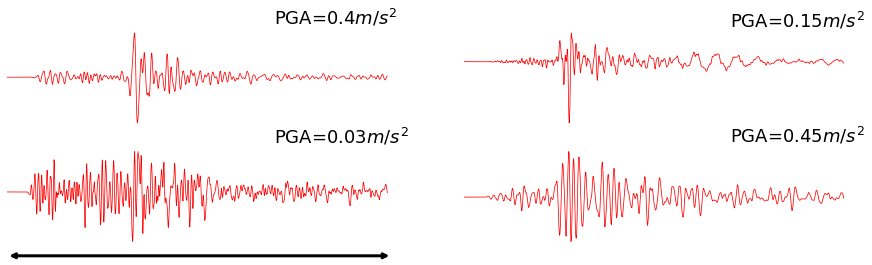

In [32]:
fnt = 18

meta, data =readerbin(4.5, 20, 400)
fig, ax = plt.subplots(2, 2, figsize =(15,4), sharex=True)
ax = ax.reshape(-1, )
for i in range(4):
    c = tfg.My_filter(data[i+4][150:][::1], 1, 45, 100)

    ax[i].plot(c[:1000], c = 'r', lw = 0.75)
    ax[i].axis('off')
    ax[i].set_xlim([0, len(c[:1000])])
    nlp = np.max((c))*1

    ax[i].text(700,+nlp+ 0.2*nlp,"PGA="+str(np.round(np.max(np.abs(nlp)),2))+"$m/s^{2}$",color = 'k', fontsize = fnt)

ax[2].annotate('', xy=(0, -0.1), xycoords='axes fraction', xytext=(1.01, -0.1),
             arrowprops=dict(arrowstyle="<->", color='k', lw =3))


#ax[2].text(450,-2, '10 s', fontsize =fnt)

plt.savefig("Fig1_1.png", dpi = 200,bbox_inches='tight')


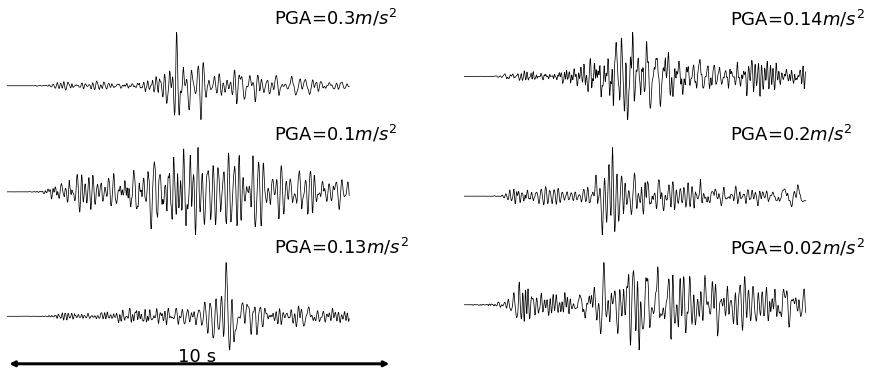

In [33]:
tx, freq , FAS, Spec, x = Model.Maker(4.5, 20, 400*1, 10,PRint = 20,
                                      mode = mode, rho = rho, eps = eps, ab = ab)

fig, ax = plt.subplots(3, 2, figsize =(15,6), sharex=True)
ax = ax.reshape(-1, )
for i in range(6):
    c = tfg.My_filter(x[i,0:][::1], 1, 20, 100)
    #c = c*2
    
    ax[i].plot(x[i,100:1000], c = 'k', lw = 0.75)
    ax[i].axis('off')
    ax[i].set_xlim([0, len(c[:1000])])
    nlp = np.max((c))
    if i ==2:
        nn = np.min(c)
    ax[i].text(700,+nlp+ 0.2*nlp,"PGA="+str(np.round(np.max(np.abs(nlp)),2))+"$m/s^{2}$",color = 'k', fontsize = fnt)

    
ax[2].annotate('', xy=(0, -1.3), xycoords='axes fraction', xytext=(1.01, -1.3),
               arrowprops=dict(arrowstyle="<->", color='k', lw =3))

ax[2].text(450,nn+3*nn, '10 s', fontsize =fnt)

plt.savefig("Fig2.png", dpi = 200,bbox_inches='tight')



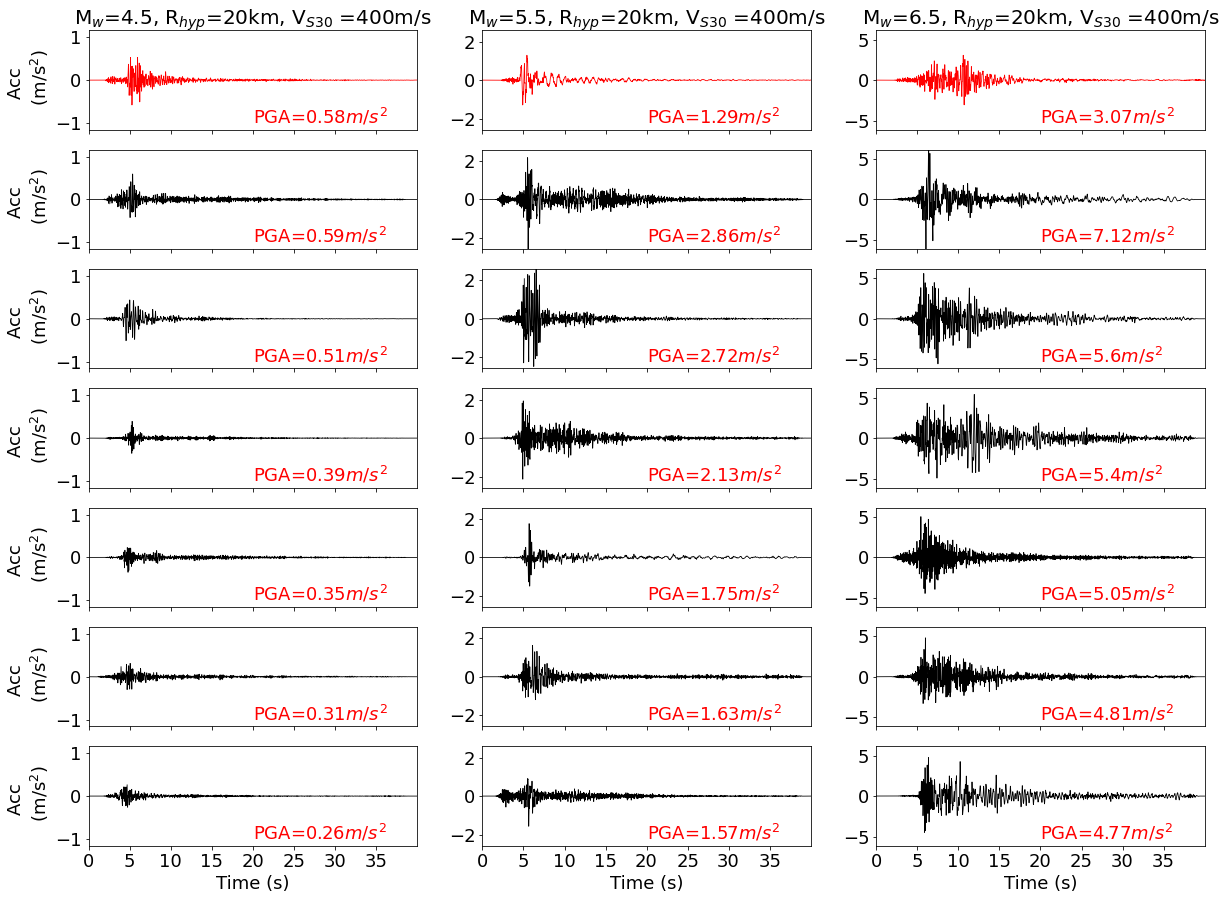

In [50]:
inum = [1, 1, 1]
fig, ax = plt.subplots(7, 3, figsize =(20,15), sharex=True)
mm = [4.5, 5.5, 6.5]
dd = 20
vv = 400 
ngen = 1
inex = [0, 0, 1]
fnt = 18


for i in range(3):
    
    meta, data =readerbin(mm[i],dd, vv)
    t = np.arange(len(data[0]))*0.01
    ind = inex[i]#find_nearest( meta[:,6], np.mean(meta[:, 6]) )
    ndp = data[ind]
    ax[0][i].plot(t, np.roll(ndp, 0),'r', lw = 0.8)
    ax[0][i].set_xlim([0, t[-1]])
    nlp = np.max(abs(ndp))*1
    ax[0][i].set_ylim(-nlp- 1*nlp, nlp+1*nlp)
    ax[0][i].set_title("M$_{w}$="+ str(mm[i])+ ", R$_{hyp}$="+str(dd)+"km, V$_{S30}$ =400m/s", fontsize = fnt+2)


    ax[0][i].text(20,-nlp- 0.75*nlp,"PGA="+str(np.round(np.max(np.abs(ndp)),2))+"$m/s^{2}$",color = 'r', fontsize = fnt)
    tx, freq , FAS, Spec, x = Model.Maker(mm[i], dd/ds, vv*1,20,PRint = 10,
                                          mode = mode, rho = rho, eps = eps, ab = ab)
    for tick in ax[0][i].yaxis.get_majorticklabels():  # example for xaxis
        tick.set_fontsize(fnt) 
        

    pi = np.log(np.max(np.abs(x),1))
    cp = np.argsort(pi)[::-1]

    
    for ii in range(1, 7):
        iii = cp[(ii-1)*1+0]
        ax[ii][i].plot(tx,1*x[iii], 'k', lw = 0.8)
        ax[ii][i].set_ylim(-nlp- 1*nlp, nlp+1*nlp)
        ax[ii][i].text(20,-nlp- 0.75*nlp,"PGA="+str(np.round(np.max(np.abs(1*x[iii])),2))+"$m/s^{2}$",color = 'r', fontsize = fnt)
        for tick in ax[ii][i].xaxis.get_majorticklabels():  # example for xaxis
            tick.set_fontsize(fnt) 
        for tick in ax[ii][i].yaxis.get_majorticklabels():  # example for xaxis
            tick.set_fontsize(fnt) 
            
        
        
ax[6][0].set_xlabel("Time (s)", fontsize = fnt)
ax[6][1].set_xlabel("Time (s)", fontsize = fnt)
ax[6][2].set_xlabel("Time (s)", fontsize = fnt)
#ax[4][3].set_xlabel("Time (s)")
for i in range(7):
    ax[i][0].set_ylabel("Acc \n (m/s$^{2}$)", fontsize = fnt)

plt.savefig("Figure06.png", dpi = 200,bbox_inches='tight')


10
10
10


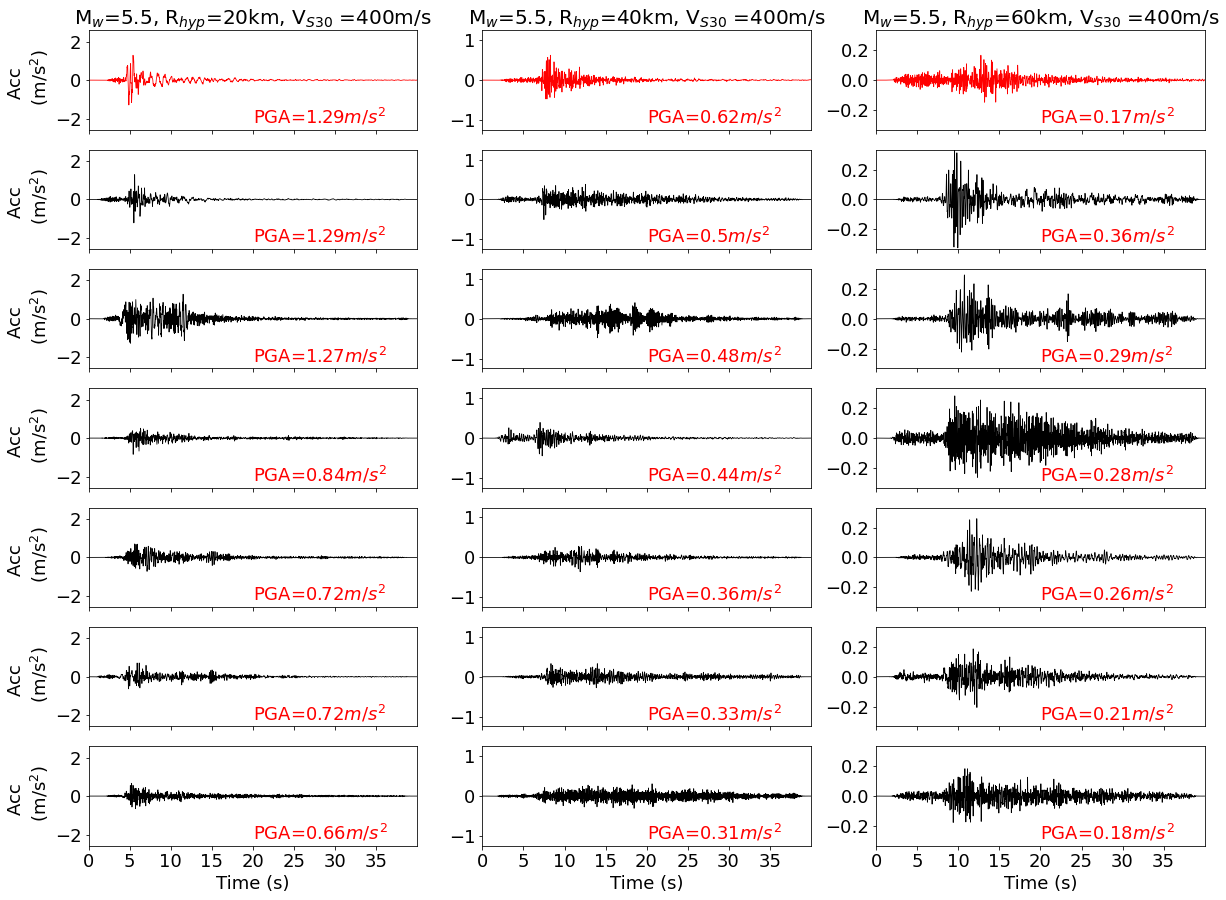

In [35]:

inex = [0, 0, 0]
fig, ax = plt.subplots(7, 3, figsize =(20,15), sharex=True)
mm = 5.5
dd = [20 , 40 , 60]
vv = 400
fnt = 18
for i in range(0, 3):
    
    
    meta, data =readerbin(mm,dd[i], vv)
    t = np.arange(len(data[0]))*0.01
    ind = inex[i]#find_nearest( meta[:,6], np.mean(meta[:, 6]) )
    ndp = data[ind]
    ax[0][i].plot(t, np.roll(ndp, 0),'r', lw = 0.8)
    ax[0][i].set_xlim([0, t[-1]])
    nlp = np.max(abs(ndp))
    ax[0][i].set_ylim(-nlp- 1*nlp, nlp+1*nlp)
    ax[0][i].set_title("M$_{w}$="+ str(mm)+ ", R$_{hyp}$="+str(dd[i])+"km, V$_{S30}$ =400m/s", fontsize = fnt+2)

    
    ax[0][i].text(20,-nlp- 0.75*nlp,"PGA="+str(np.round(np.max(np.abs(ndp)),2))+"$m/s^{2}$",color = 'r', fontsize = fnt)
    tx, freq , FAS, Spec, x = Model.Maker(mm, dd[i] / ds , vv*1, 10,PRint = 20,
                                          mode = mode, rho = rho, eps = eps, ab = ab)
    

    for tick in ax[0][i].yaxis.get_majorticklabels():  # example for xaxis
        tick.set_fontsize(fnt) 


    pi = np.log(np.max(np.abs(x),1))
    cp = np.argsort(pi)[::-1]
    print(len(cp))
    
    for ii in range(1, 7):
        iii =  cp[(ii-1)*1]
        ax[ii][i].plot(tx,1*x[iii], 'k', lw = 0.8)
        ax[ii][i].set_ylim(-nlp- 1*nlp, nlp+1*nlp)
        ax[ii][i].text(20,-nlp- 0.75*nlp,"PGA="+str(np.round(np.max(np.abs(1*x[iii])),2))+"$m/s^{2}$",color = 'r', fontsize = fnt)
        for tick in ax[ii][i].xaxis.get_majorticklabels():  # example for xaxis
            tick.set_fontsize(fnt) 
        for tick in ax[ii][i].yaxis.get_majorticklabels():  # example for xaxis
            tick.set_fontsize(fnt) 

        
        
        
ax[6][0].set_xlabel("Time (s)", fontsize = fnt)
ax[6][1].set_xlabel("Time (s)", fontsize = fnt)
ax[6][2].set_xlabel("Time (s)", fontsize = fnt)
#ax[4][3].set_xlabel("Time (s)")
for i in range(7):
    ax[i][0].set_ylabel("Acc \n (m/s$^{2}$)", fontsize = fnt)
    


plt.savefig("Figure07.png", dpi = 200,bbox_inches='tight')



## Supplimantry Figures


1.1262706518173218
0.9938714504241943
3.4101686477661133


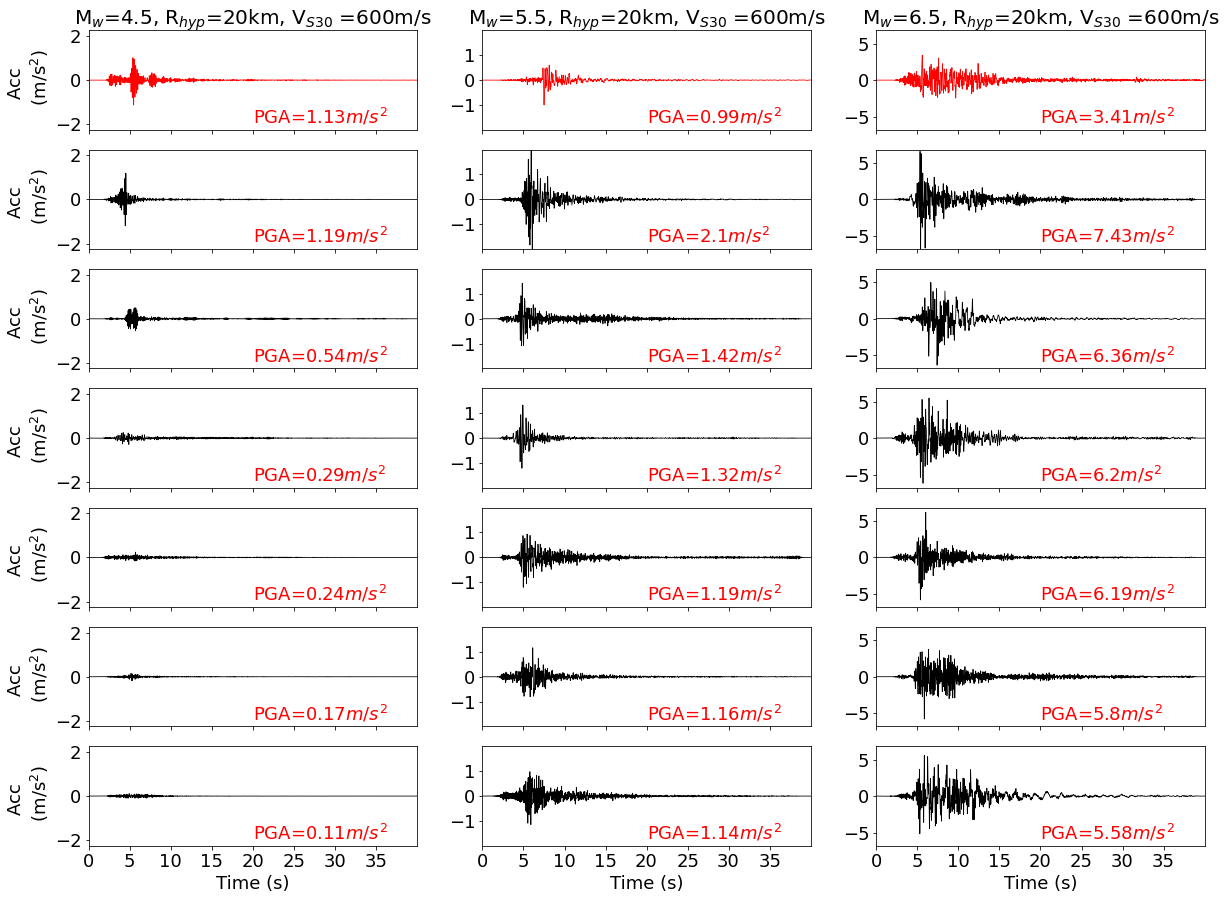

In [36]:

inum = [1, 1, 1]
fig, ax = plt.subplots(7, 3, figsize =(20,15), sharex=True)
mm = [4.5, 5.5, 6.5]
dd = 20
vv = 600 
ngen = 1
inex = [0, 0, 0]
fnt = 18

for i in range(3):
    
    meta, data =readerbin(mm[i],dd, vv)
    t = np.arange(len(data[0]))*0.01
    ind = inex[i]#find_nearest( meta[:,6], np.mean(meta[:, 6]) )
    ndp = data[ind]
    ax[0][i].plot(t, np.roll(ndp, 0),'r', lw = 0.8)
    ax[0][i].set_xlim([0, t[-1]])
    nlp = np.max(abs(ndp))*1
    ax[0][i].set_ylim(-nlp- 1*nlp, nlp+1*nlp)
    ax[0][i].set_title("M$_{w}$="+ str(mm[i])+ ", R$_{hyp}$="+str(dd)+"km, V$_{S30}$ ="+str(vv)+"m/s", fontsize = fnt+2)
    print(nlp)
    ax[0][i].text(20,-nlp- 0.75*nlp,"PGA="+str(np.round(np.max(np.abs(ndp)),2))+"$m/s^{2}$",color = 'r', fontsize = fnt)
    tx, freq , FAS, Spec, x = Model.Maker(mm[i], dd/ ds, vv*1, 8,PRint = 20,
                                          mode = mode, rho = rho, eps = eps, ab = ab)
    for tick in ax[0][i].yaxis.get_majorticklabels():  # example for xaxis
        tick.set_fontsize(fnt) 


        pi = np.log(np.max(np.abs(x),1))
    cp = np.argsort(pi)[::-1]
    #print(len(cp))
    
    for ii in range(1, 7):
        iii = cp[(ii-1)*1+0]
        ax[ii][i].plot(tx,1*x[iii], 'k', lw = 0.8)
        ax[ii][i].set_ylim(-nlp- 1*nlp, nlp+1*nlp)
        ax[ii][i].text(20,-nlp- 0.75*nlp,"PGA="+str(np.round(np.max(np.abs(1*x[iii])),2))+"$m/s^{2}$",color = 'r', fontsize = fnt)
        for tick in ax[ii][i].xaxis.get_majorticklabels():  # example for xaxis
            tick.set_fontsize(fnt) 
        for tick in ax[ii][i].yaxis.get_majorticklabels():  # example for xaxis
            tick.set_fontsize(fnt) 
        
ax[6][0].set_xlabel("Time (s)", fontsize = fnt)
ax[6][1].set_xlabel("Time (s)", fontsize = fnt)
ax[6][2].set_xlabel("Time (s)", fontsize = fnt)
#ax[4][3].set_xlabel("Time (s)")
for i in range(7):
    ax[i][0].set_ylabel("Acc \n (m/s$^{2}$)", fontsize = fnt)

plt.savefig("FigureS1_1.png", dpi = 200,bbox_inches='tight')



0.16897360980510712
0.43926623463630676
6.621115684509277


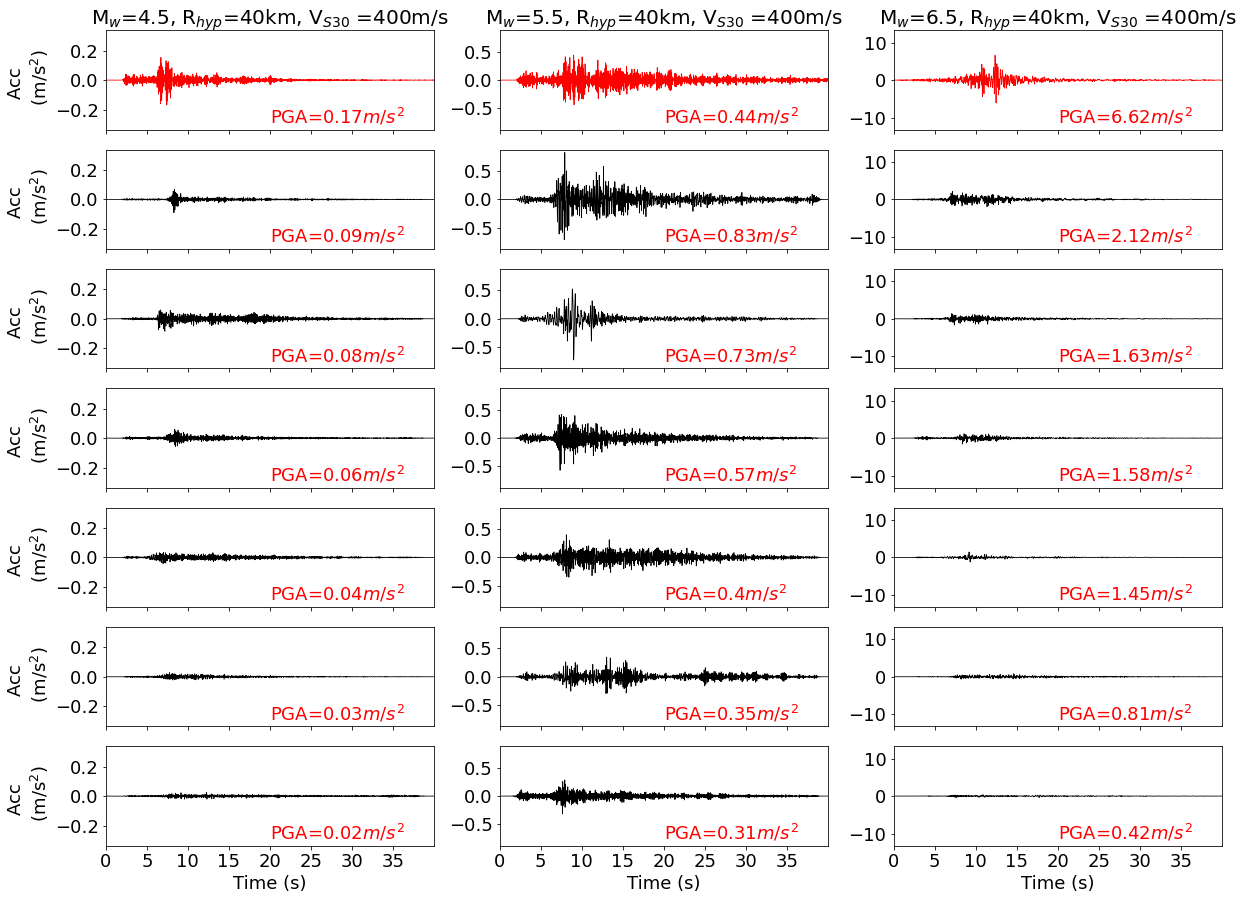

In [37]:

inum = [1, 1, 1]
fig, ax = plt.subplots(7, 3, figsize =(20,15), sharex=True)
mm = [4.5, 5.5, 6.5]
dd = 40
vv = 600 
ngen = 1
inex = [0, 0, 0]
fnt = 18

for i in range(3):
    
    meta, data =readerbin(mm[i],dd, vv)
    t = np.arange(len(data[0]))*0.01
    ind = inex[i]#find_nearest( meta[:,6], np.mean(meta[:, 6]) )
    ndp = data[ind]
    ax[0][i].plot(t, np.roll(ndp, 0),'r', lw = 0.8)
    ax[0][i].set_xlim([0, t[-1]])
    nlp = np.max(abs(ndp))*1
    ax[0][i].set_ylim(-nlp- 1*nlp, nlp+1*nlp)
    ax[0][i].set_title("M$_{w}$="+ str(mm[i])+ ", R$_{hyp}$="+str(dd)+"km, V$_{S30}$ =400m/s", fontsize = fnt+2)
    print(nlp)
    ax[0][i].text(20,-nlp- 0.75*nlp,"PGA="+str(np.round(np.max(np.abs(ndp)),2))+"$m/s^{2}$",color = 'r', fontsize = fnt)
    tx, freq , FAS, Spec, x = Model.Maker(mm[i], dd/ ds , vv*1, 8,PRint = 20,
                                          mode = mode, rho = rho, eps = eps, ab = ab)
    for tick in ax[0][i].yaxis.get_majorticklabels():  # example for xaxis
        tick.set_fontsize(fnt) 

    pi = np.log(np.max(np.abs(x),1))
    cp = np.argsort(pi)[::-1]
    #print(len(cp))
    
    for ii in range(1, 7):
        iii = cp[(ii-1)*1+0]
        ax[ii][i].plot(tx,1*x[iii], 'k', lw = 0.8)
        ax[ii][i].set_ylim(-nlp- 1*nlp, nlp+1*nlp)
        ax[ii][i].text(20,-nlp- 0.75*nlp,"PGA="+str(np.round(np.max(np.abs(1*x[iii])),2))+"$m/s^{2}$",color = 'r', fontsize = fnt)
        for tick in ax[ii][i].xaxis.get_majorticklabels():  # example for xaxis
            tick.set_fontsize(fnt) 
        for tick in ax[ii][i].yaxis.get_majorticklabels():  # example for xaxis
            tick.set_fontsize(fnt) 
        
ax[6][0].set_xlabel("Time (s)", fontsize = fnt)
ax[6][1].set_xlabel("Time (s)", fontsize = fnt)
ax[6][2].set_xlabel("Time (s)", fontsize = fnt)
#ax[4][3].set_xlabel("Time (s)")
for i in range(7):
    ax[i][0].set_ylabel("Acc \n (m/s$^{2}$)", fontsize = fnt)

plt.savefig("FigureS1_2.png", dpi = 200,bbox_inches='tight')


0.012316584587097168
0.08407237380743027
0.6984766721725464


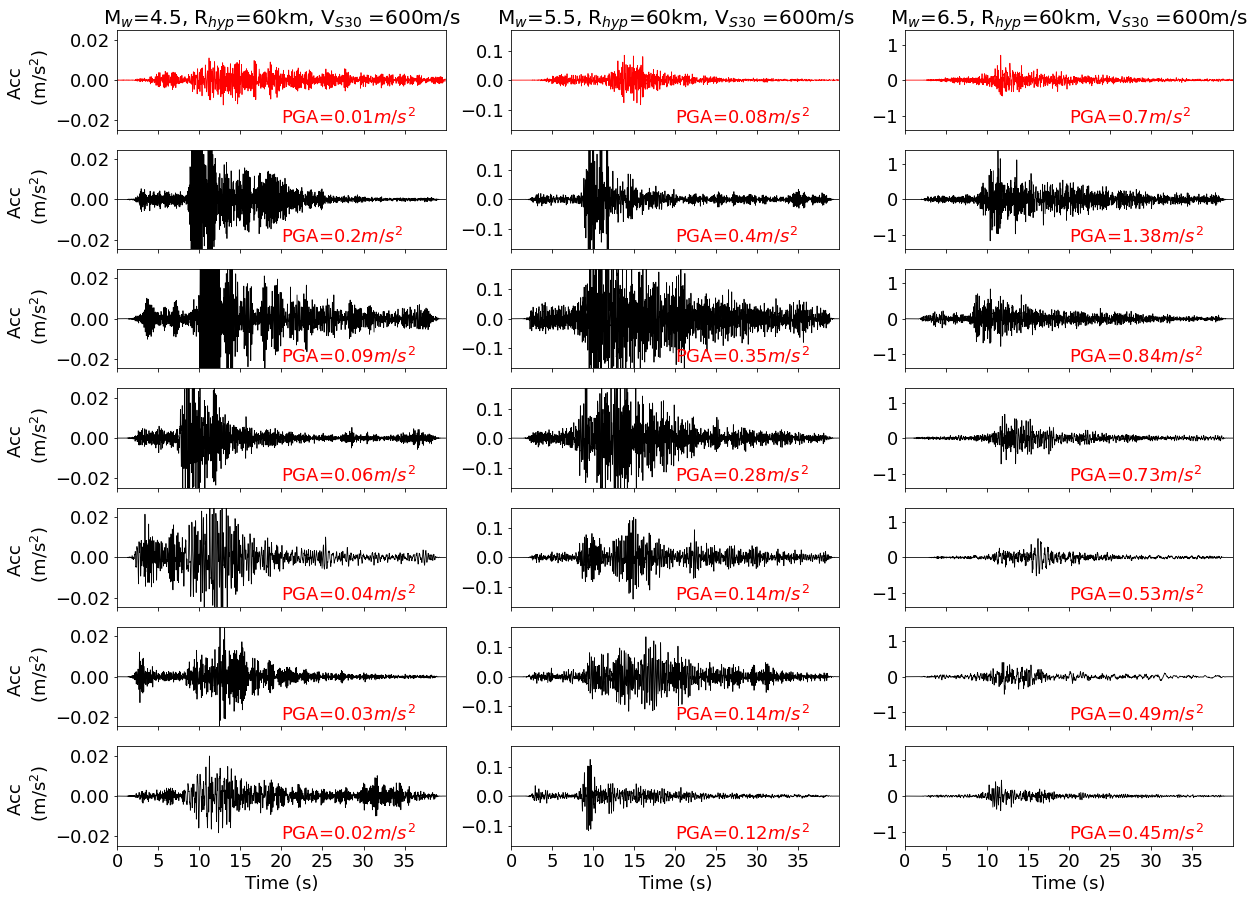

In [44]:

inum = [1, 1, 1]
fig, ax = plt.subplots(7, 3, figsize =(20,15), sharex=True)
mm = [4.5, 5.5, 6.5]
dd = 60
vv = 600 
ngen = 1
inex = [0, 0, 0]
fnt = 18

for i in range(3):
    
    meta, data =readerbin(mm[i],dd, vv)
    t = np.arange(len(data[0]))*0.01
    ind = inex[i]#find_nearest( meta[:,6], np.mean(meta[:, 6]) )
    ndp = data[ind]
    ax[0][i].plot(t, np.roll(ndp, 0),'r', lw = 0.8)
    ax[0][i].set_xlim([0, t[-1]])
    nlp = np.max(abs(ndp))*1
    ax[0][i].set_ylim(-nlp- 1*nlp, nlp+1*nlp)
    ax[0][i].set_title("M$_{w}$="+ str(mm[i])+ ", R$_{hyp}$="+str(dd)+"km, V$_{S30}$ ="+str(vv)+"m/s", fontsize = fnt+2)
    print(nlp)
    ax[0][i].text(20,-nlp- 0.75*nlp,"PGA="+str(np.round(np.max(np.abs(ndp)),2))+"$m/s^{2}$",color = 'r', fontsize = fnt)
    tx, freq , FAS, Spec, x = Model.Maker(mm[i], dd/ ds, vv*1, 8,PRint = 20,
                                          mode = mode, rho = rho, eps = eps, ab = ab)
    for tick in ax[0][i].yaxis.get_majorticklabels():  # example for xaxis
        tick.set_fontsize(fnt) 


    pi = np.log(np.max(np.abs(x),1))
    cp = np.argsort(pi)[::-1]
    #print(len(cp))
    
    for ii in range(1, 7):
        iii = cp[(ii-1)*1+0]
        ax[ii][i].plot(tx,1*x[iii], 'k', lw = 0.8)
        ax[ii][i].set_ylim(-nlp- 1*nlp, nlp+1*nlp)
        ax[ii][i].text(20,-nlp- 0.75*nlp,"PGA="+str(np.round(np.max(np.abs(1*x[iii])),2))+"$m/s^{2}$",color = 'r', fontsize = fnt)
        for tick in ax[ii][i].xaxis.get_majorticklabels():  # example for xaxis
            tick.set_fontsize(fnt) 
        for tick in ax[ii][i].yaxis.get_majorticklabels():  # example for xaxis
            tick.set_fontsize(fnt) 
        
ax[6][0].set_xlabel("Time (s)", fontsize = fnt)
ax[6][1].set_xlabel("Time (s)", fontsize = fnt)
ax[6][2].set_xlabel("Time (s)", fontsize = fnt)
#ax[4][3].set_xlabel("Time (s)")
for i in range(7):
    ax[i][0].set_ylabel("Acc \n (m/s$^{2}$)", fontsize = fnt)

plt.savefig("FigureS21_3.png", dpi = 200,bbox_inches='tight')


0.14049246907234192
1.3576828241348267
0.9903035163879395


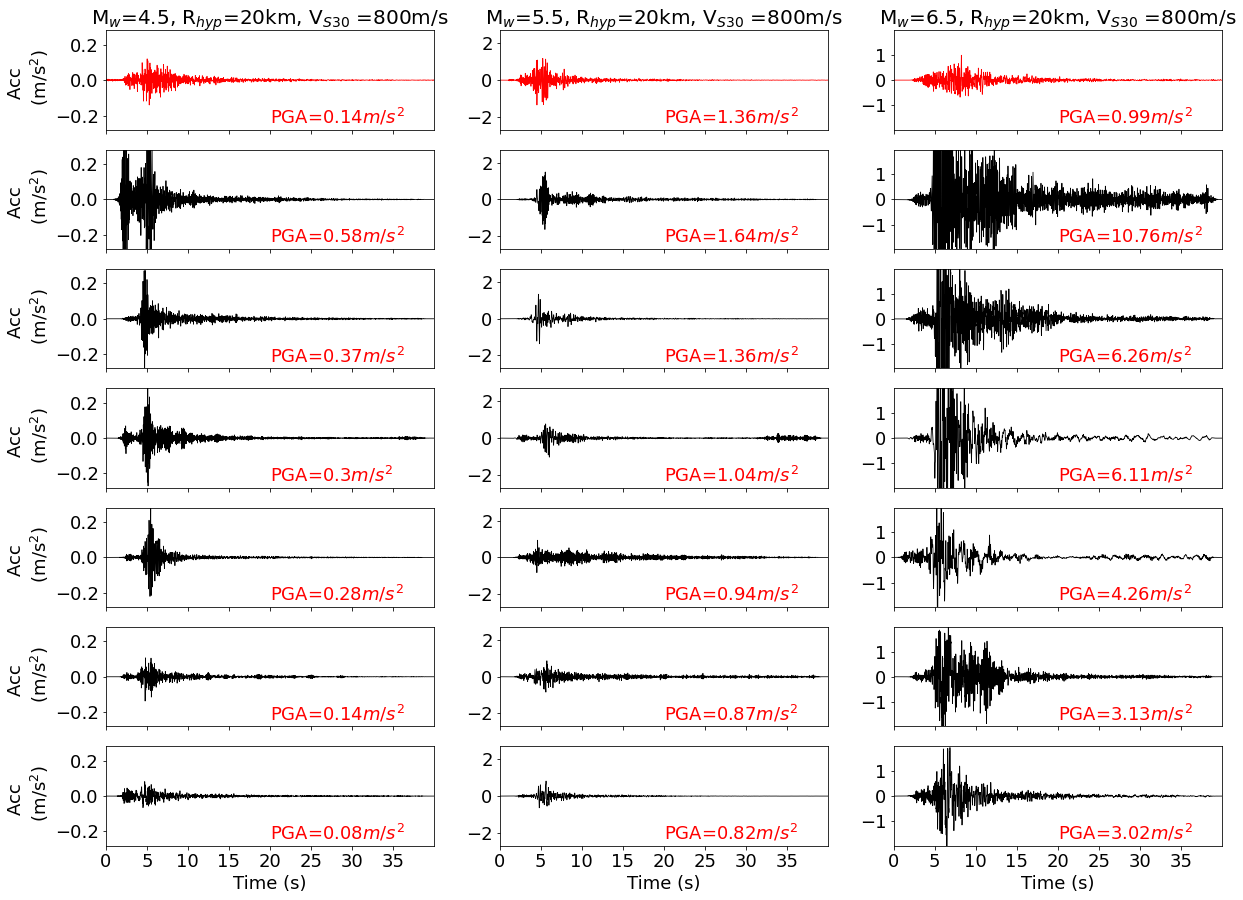

In [39]:

inum = [1, 1, 1]
fig, ax = plt.subplots(7, 3, figsize =(20,15), sharex=True)
mm = [4.5, 5.5, 6.5]
dd = 20
vv = 800 
ngen = 1
inex = [0, 0, 0]
fnt = 18

for i in range(3):

    
    meta, data =readerbin(mm[i],dd, vv)

    if len(data) ==0:
        meta, data =readerbin(6,dd, 800)

    t = np.arange(len(data[0]))*0.01
    ind = inex[i]#find_nearest( meta[:,6], np.mean(meta[:, 6]) )
    ndp = data[ind]
    ax[0][i].plot(t, np.roll(ndp, 0),'r', lw = 0.8)
    ax[0][i].set_xlim([0, t[-1]])
    nlp = np.max(abs(ndp))*1
    ax[0][i].set_ylim(-nlp- 1*nlp, nlp+1*nlp)
    ax[0][i].set_title("M$_{w}$="+ str(mm[i])+ ", R$_{hyp}$="+str(dd)+"km, V$_{S30}$ ="+str(vv)+"m/s", fontsize = fnt+2)
    print(nlp)
    ax[0][i].text(20,-nlp- 0.75*nlp,"PGA="+str(np.round(np.max(np.abs(ndp)),2))+"$m/s^{2}$",color = 'r', fontsize = fnt)
    tx, freq , FAS, Spec, x = Model.Maker(mm[i], dd/ds, vv* 1, 8,PRint = 20,
                                          mode = mode, rho = rho, eps = eps, ab = ab)
    for tick in ax[0][i].yaxis.get_majorticklabels():  # example for xaxis
        tick.set_fontsize(fnt) 

        
    pi = np.log(np.max(np.abs(x),1))
    cp = np.argsort(pi)[::-1]
    #print(len(cp))
    
    for ii in range(1, 7):
        iii = cp[(ii-1)*1+0]
        ax[ii][i].plot(tx,1*x[iii], 'k', lw = 0.8)
        ax[ii][i].set_ylim(-nlp- 1*nlp, nlp+1*nlp)
        ax[ii][i].text(20,-nlp- 0.75*nlp,"PGA="+str(np.round(np.max(np.abs(1*x[iii])),2))+"$m/s^{2}$",color = 'r', fontsize = fnt)
        for tick in ax[ii][i].xaxis.get_majorticklabels():  # example for xaxis
            tick.set_fontsize(fnt) 
        for tick in ax[ii][i].yaxis.get_majorticklabels():  # example for xaxis
            tick.set_fontsize(fnt) 

        
ax[6][0].set_xlabel("Time (s)", fontsize = fnt)
ax[6][1].set_xlabel("Time (s)", fontsize = fnt)
ax[6][2].set_xlabel("Time (s)", fontsize = fnt)
#ax[4][3].set_xlabel("Time (s)")
for i in range(7):
    ax[i][0].set_ylabel("Acc \n (m/s$^{2}$)", fontsize = fnt)

plt.savefig("FigureS21_4.png", dpi = 200,bbox_inches='tight')


0.08113542199134827
0.587340235710144
1.7094630002975464


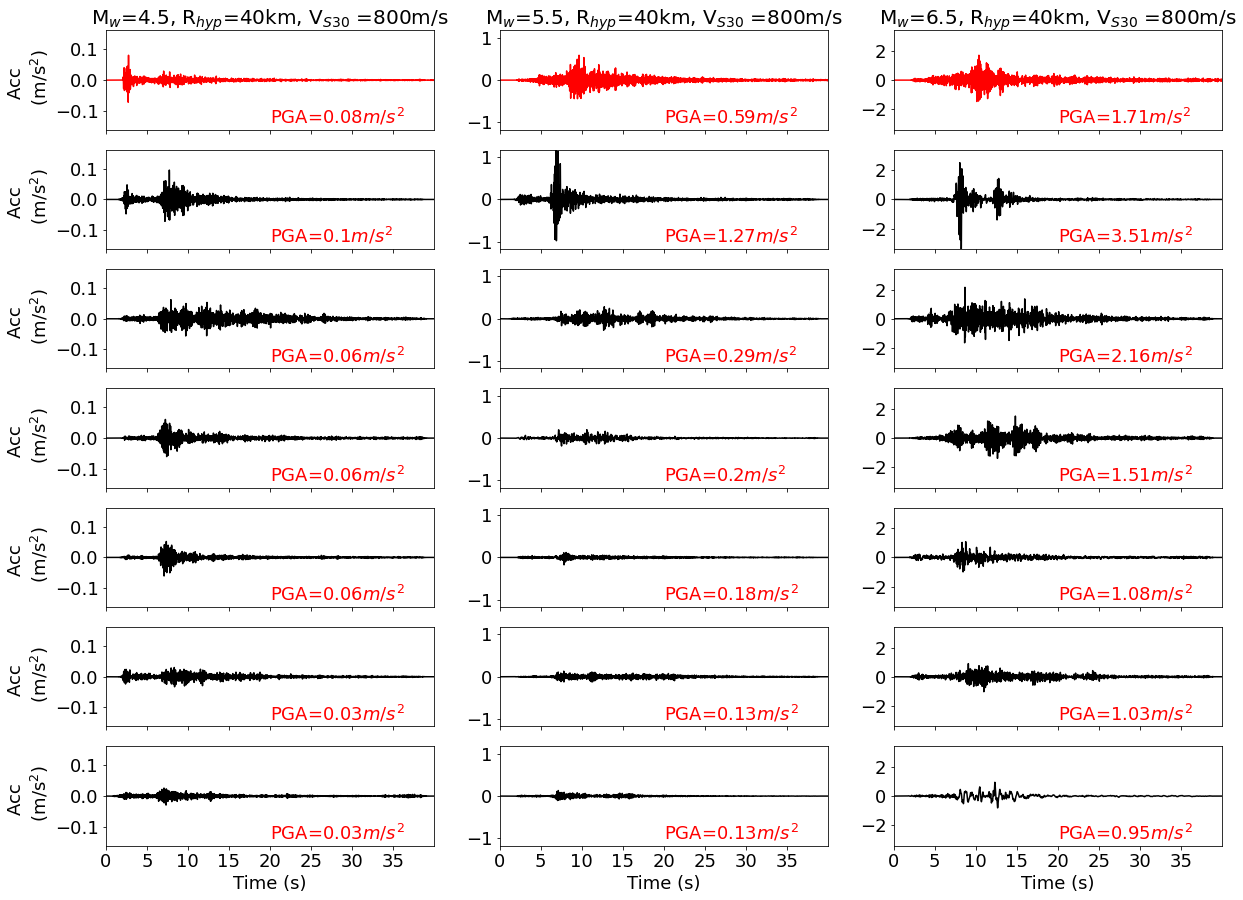

In [49]:

inum = [1, 1, 1]
fig, ax = plt.subplots(7, 3, figsize =(20,15), sharex=True)
mm = [4.5, 5.5, 6.5]
dd = 40
vv = 800 
ngen = 1
inex = [0, 0, 0]
fnt = 18

for i in range(3):
    
    meta, data =readerbin(mm[i],dd, vv)
    t = np.arange(len(data[0]))*0.01
    ind = inex[i]#find_nearest( meta[:,6], np.mean(meta[:, 6]) )
    ndp = data[ind]
    ax[0][i].plot(t, np.roll(ndp, 0),'r')
    ax[0][i].set_xlim([0, t[-1]])
    nlp = np.max(abs(ndp))*1
    ax[0][i].set_ylim(-nlp- 1*nlp, nlp+1*nlp)
    ax[0][i].set_title("M$_{w}$="+ str(mm[i])+ ", R$_{hyp}$="+str(dd)+"km, V$_{S30}$ ="+str(vv)+"m/s", fontsize = fnt+2)
    print(nlp)
    ax[0][i].text(20,-nlp- 0.75*nlp,"PGA="+str(np.round(np.max(np.abs(ndp)),2))+"$m/s^{2}$",color = 'r', fontsize = fnt)
    tx, freq , FAS, Spec, x = Model.Maker(mm[i], dd/ds, vv*1, 8,PRint = 20,
                                          mode = mode, rho = rho, eps = eps, ab = ab)
    for tick in ax[0][i].yaxis.get_majorticklabels():  # example for xaxis
        tick.set_fontsize(fnt) 

    
    pi = np.log(np.max(np.abs(x),1))
    cp = np.argsort(pi)[::-1]
    #print(len(cp))
    
    for ii in range(1, 7):
        iii = cp[(ii-1)*1+0]
        ax[ii][i].plot(tx,1*x[iii], 'k')
        ax[ii][i].set_ylim(-nlp- 1*nlp, nlp+1*nlp)
        ax[ii][i].text(20,-nlp- 0.75*nlp,"PGA="+str(np.round(np.max(np.abs(1*x[iii])),2))+"$m/s^{2}$",color = 'r', fontsize = fnt)
        for tick in ax[ii][i].xaxis.get_majorticklabels():  # example for xaxis
            tick.set_fontsize(fnt) 
        for tick in ax[ii][i].yaxis.get_majorticklabels():  # example for xaxis
            tick.set_fontsize(fnt) 

        
ax[6][0].set_xlabel("Time (s)", fontsize = fnt)
ax[6][1].set_xlabel("Time (s)", fontsize = fnt)
ax[6][2].set_xlabel("Time (s)", fontsize = fnt)
#ax[4][3].set_xlabel("Time (s)")
for i in range(7):
    ax[i][0].set_ylabel("Acc \n (m/s$^{2}$)", fontsize = fnt)

plt.savefig("FigureS21_5.png", dpi = 200,bbox_inches='tight')


0.09052801877260208
0.5903577208518982
0.918733537197113


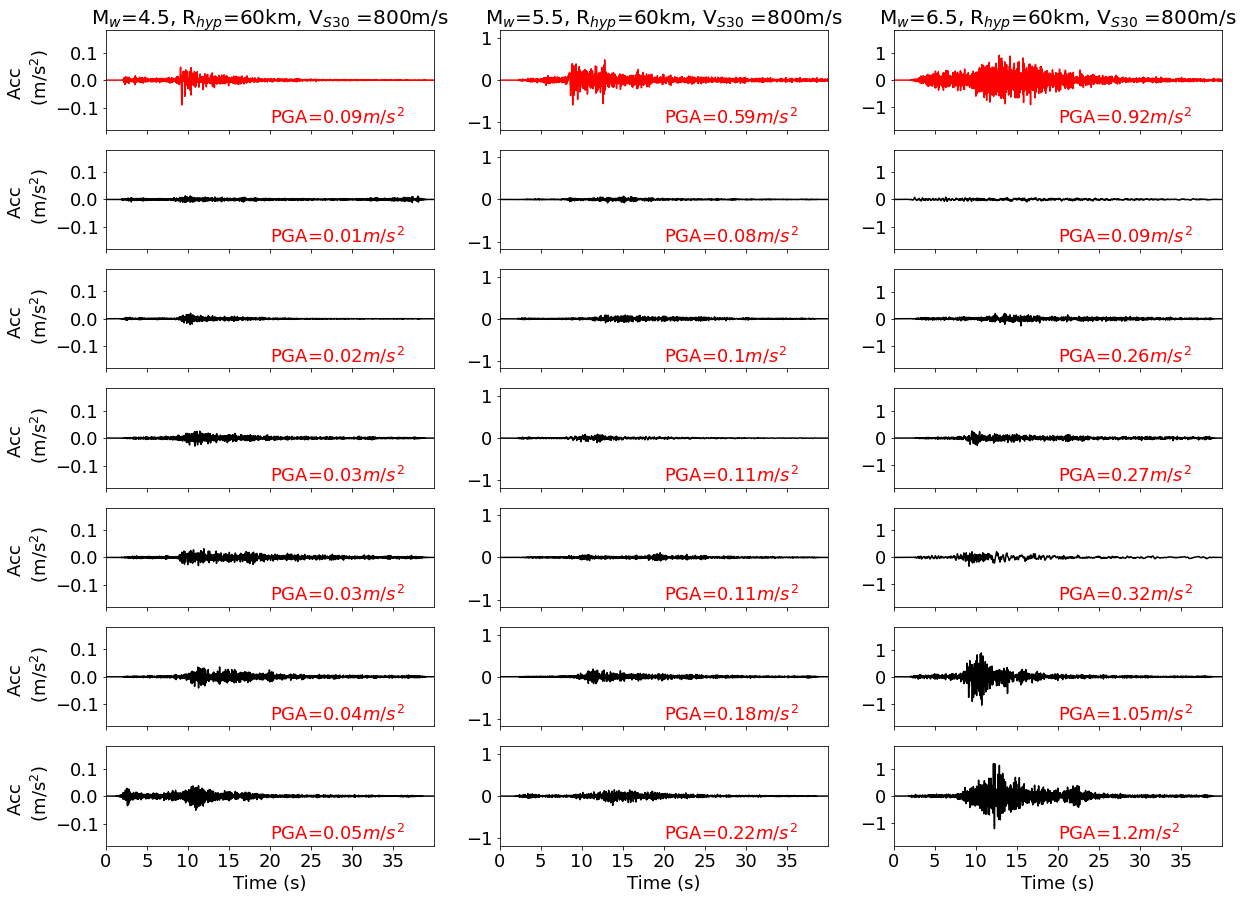

In [48]:

inum = [1, 1, 1]
fig, ax = plt.subplots(7, 3, figsize =(20,15), sharex=True)
mm = [4.5, 5.5, 6.5]
dd = 60
vv = 800 
ngen = 1
inex = [0, 0, 0]
fnt = 18

for i in range(3):
    
    meta, data =readerbin(mm[i],dd, vv)
    t = np.arange(len(data[0]))*0.01
    ind = inex[i]#find_nearest( meta[:,6], np.mean(meta[:, 6]) )
    ndp = data[ind]
    ax[0][i].plot(t, np.roll(ndp, 0),'r')
    ax[0][i].set_xlim([0, t[-1]])
    nlp = np.max(abs(ndp))*1
    ax[0][i].set_ylim(-nlp- 1*nlp, nlp+1*nlp)
    ax[0][i].set_title("M$_{w}$="+ str(mm[i])+ ", R$_{hyp}$="+str(dd)+"km, V$_{S30}$ ="+str(vv)+"m/s", fontsize = fnt+2)
    print(nlp)
    ax[0][i].text(20,-nlp- 0.75*nlp,"PGA="+str(np.round(np.max(np.abs(ndp)),2))+"$m/s^{2}$",color = 'r', fontsize = fnt)
    tx, freq , FAS, Spec, x = Model.Maker(mm[i], dd/ds, vv*1, 8,PRint = 20,
                                          mode = mode, rho = rho, eps = eps, ab = ab)
    for tick in ax[0][i].yaxis.get_majorticklabels():  # example for xaxis
        tick.set_fontsize(fnt) 


    
    pi = np.log(np.max(np.abs(x),1))
    cp = np.argsort(pi)[::1]
    #print(len(cp))
    
    for ii in range(1, 7):
        iii = cp[(ii-1)*1+0]
        ax[ii][i].plot(tx,1*x[iii], 'k')
        ax[ii][i].set_ylim(-nlp- 1*nlp, nlp+1*nlp)
        ax[ii][i].text(20,-nlp- 0.75*nlp,"PGA="+str(np.round(np.max(np.abs(1*x[iii])),2))+"$m/s^{2}$",color = 'r', fontsize = fnt)
        for tick in ax[ii][i].xaxis.get_majorticklabels():  # example for xaxis
            tick.set_fontsize(fnt) 
        for tick in ax[ii][i].yaxis.get_majorticklabels():  # example for xaxis
            tick.set_fontsize(fnt) 

        
ax[6][0].set_xlabel("Time (s)", fontsize = fnt)
ax[6][1].set_xlabel("Time (s)", fontsize = fnt)
ax[6][2].set_xlabel("Time (s)", fontsize = fnt)
#ax[4][3].set_xlabel("Time (s)")
for i in range(7):
    ax[i][0].set_ylabel("Acc \n (m/s$^{2}$)", fontsize = fnt)

plt.savefig("FigureS21_6.png", dpi = 200,bbox_inches='tight')



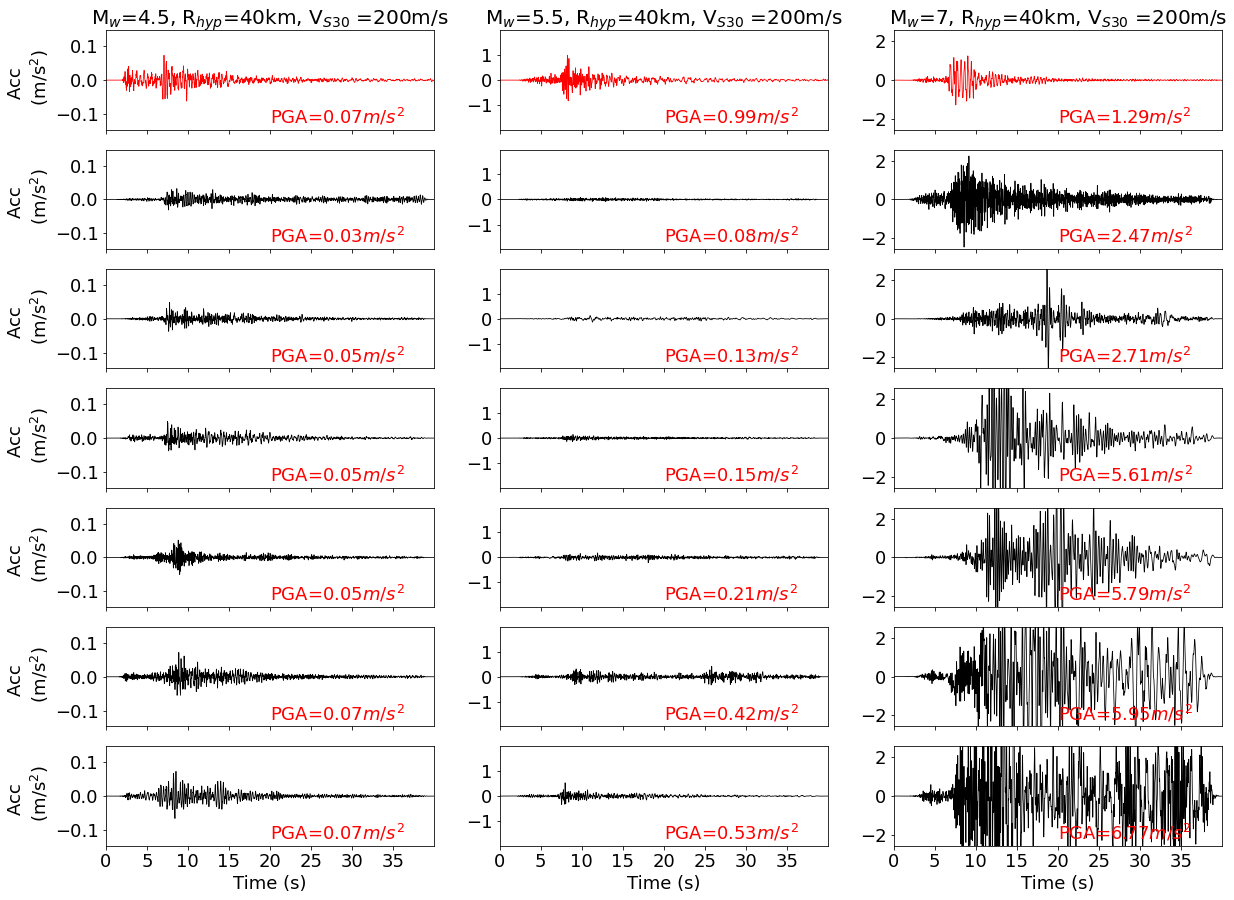

In [46]:

inum = [1, 1, 1]
fig, ax = plt.subplots(7, 3, figsize =(20,15), sharex=True)
mm = [4.5, 5.5, 7]
dd = 40
vv = 200 
ngen = 1
inex = [0, 0, 0]
fnt = 18

for i in range(3):

    
    meta, data =readerbin(mm[i],dd, vv)
    if len(data) ==0:
        meta, data =readerbin(6,dd, 200)


    t = np.arange(len(data[0]))*0.01
    ind = inex[i]#find_nearest( meta[:,6], np.mean(meta[:, 6]) )
    ndp = data[ind]
    ax[0][i].plot(t, np.roll(ndp, 0),'r', lw = 0.8)
    ax[0][i].set_xlim([0, t[-1]])
    nlp = np.max(abs(ndp))*1
    ax[0][i].set_ylim(-nlp- 1*nlp, nlp+1*nlp)
    ax[0][i].set_title("M$_{w}$="+ str(mm[i])+ ", R$_{hyp}$="+str(dd)+"km, V$_{S30}$ ="+str(vv)+"m/s", fontsize = fnt+2)

    ax[0][i].text(20,-nlp- 0.75*nlp,"PGA="+str(np.round(np.max(np.abs(ndp)),2))+"$m/s^{2}$",color = 'r', fontsize = fnt)
    tx, freq , FAS, Spec, x = Model.Maker(mm[i], dd/ds, vv*1, 8,PRint = 20,
                                          mode = mode, rho = rho, eps = eps, ab = ab)
    for tick in ax[0][i].yaxis.get_majorticklabels():  # example for xaxis
        tick.set_fontsize(fnt) 


    pi = np.log(np.max(np.abs(x),1))
    cp = np.argsort(pi)[::1]
    #print(len(cp))
    
    for ii in range(1, 7):
        iii = cp[(ii-1)*1+0]
        ax[ii][i].plot(tx,1*x[iii], 'k', lw = 0.8)
        ax[ii][i].set_ylim(-nlp- 1*nlp, nlp+1*nlp)
        ax[ii][i].text(20,-nlp- 0.75*nlp,"PGA="+str(np.round(np.max(np.abs(1*x[iii])),2))+"$m/s^{2}$", color = 'r',fontsize = fnt)
        for tick in ax[ii][i].xaxis.get_majorticklabels():  # example for xaxis
            tick.set_fontsize(fnt) 
        for tick in ax[ii][i].yaxis.get_majorticklabels():  # example for xaxis
            tick.set_fontsize(fnt) 

        
ax[6][0].set_xlabel("Time (s)", fontsize = fnt)
ax[6][1].set_xlabel("Time (s)", fontsize = fnt)
ax[6][2].set_xlabel("Time (s)", fontsize = fnt)
#ax[4][3].set_xlabel("Time (s)")
for i in range(7):
    ax[i][0].set_ylabel("Acc \n (m/s$^{2}$)", fontsize = fnt)

plt.savefig("FigureS21_7.png", dpi = 200,bbox_inches='tight')


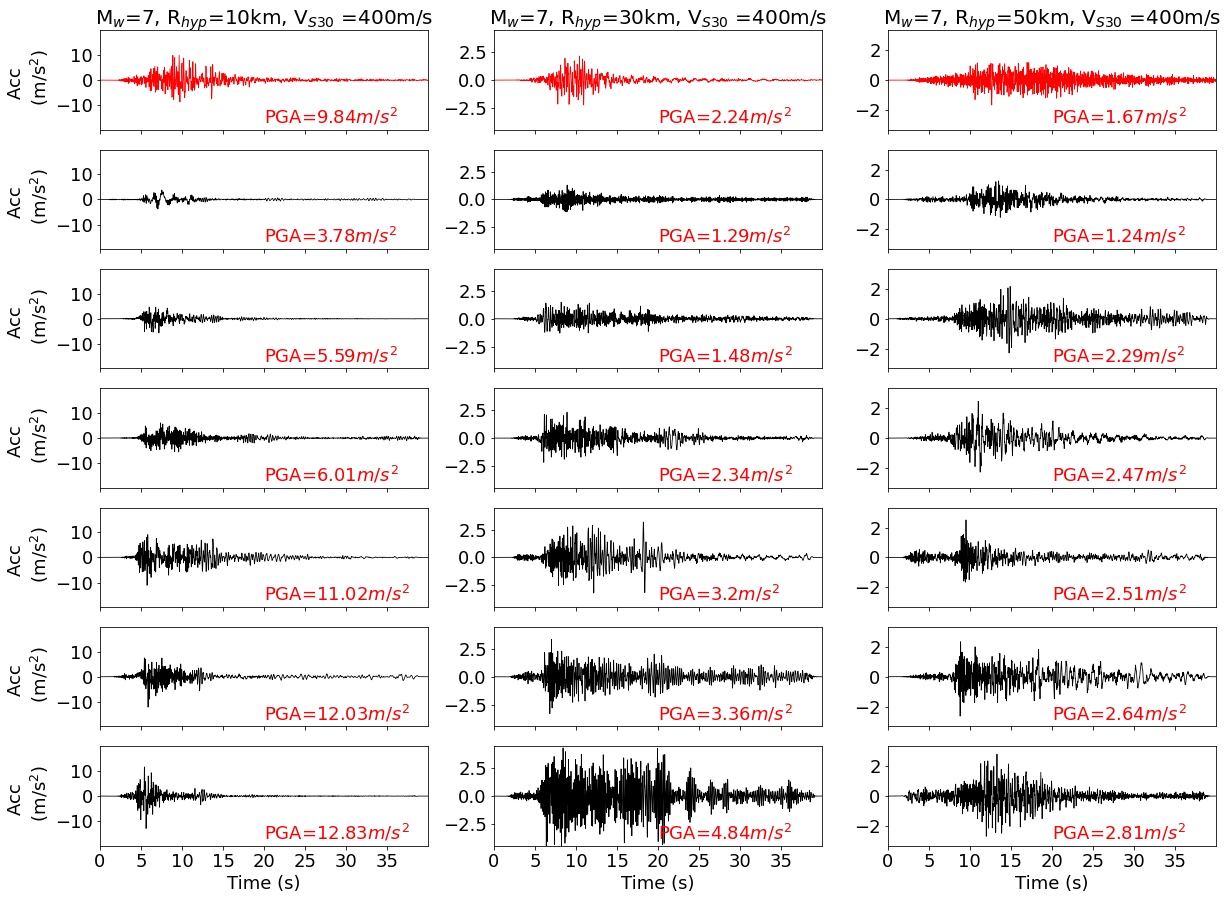

In [47]:

inex = [0, 0, 0]
fig, ax = plt.subplots(7, 3, figsize =(20,15), sharex=True)
mm = 7
dd = [10 , 30 , 50]
vv = 400
fnt = 18
for i in range(0, 3):
    
    
    meta, data =readerbin(mm,dd[i], vv)
    t = np.arange(len(data[0]))*0.01
    ind = inex[i]#find_nearest( meta[:,6], np.mean(meta[:, 6]) )
    ndp = data[ind]
    ax[0][i].plot(t, np.roll(ndp, 0),'r', lw = 0.8)
    ax[0][i].set_xlim([0, t[-1]])
    nlp = np.max(abs(ndp))
    ax[0][i].set_ylim(-nlp- 1*nlp, nlp+1*nlp)
    ax[0][i].set_title("M$_{w}$="+ str(mm)+ ", R$_{hyp}$="+str(dd[i])+"km, V$_{S30}$ =400m/s", fontsize = fnt+2)

    
    ax[0][i].text(20,-nlp- 0.75*nlp,"PGA="+str(np.round(np.max(np.abs(ndp)),2))+"$m/s^{2}$",color = 'r', fontsize = fnt)
    tx, freq , FAS, Spec, x = Model.Maker(mm, dd[i] / ds , vv*1, 10,PRint = 20,
                                          mode = mode, rho = rho, eps = eps, ab = ab)
    #x = x*2
    for tick in ax[0][i].yaxis.get_majorticklabels():  # example for xaxis
        tick.set_fontsize(fnt) 

    pi = np.log(np.max(np.abs(x),1))
    cp = np.argsort(pi)[::1]

    
    for ii in range(1, 7):
        iii = cp[(ii-1)*1]
        ax[ii][i].plot(tx,1*x[iii], 'k', lw = 0.8)
        ax[ii][i].set_ylim(-nlp- 1*nlp, nlp+1*nlp)
        ax[ii][i].text(20,-nlp- 0.75*nlp,"PGA="+str(np.round(np.max(np.abs(1*x[iii])),2))+"$m/s^{2}$",color = 'r', fontsize = fnt)
        for tick in ax[ii][i].xaxis.get_majorticklabels():  # example for xaxis
            tick.set_fontsize(fnt) 
        for tick in ax[ii][i].yaxis.get_majorticklabels():  # example for xaxis
            tick.set_fontsize(fnt) 

        
        
        
ax[6][0].set_xlabel("Time (s)", fontsize = fnt)
ax[6][1].set_xlabel("Time (s)", fontsize = fnt)
ax[6][2].set_xlabel("Time (s)", fontsize = fnt)
#ax[4][3].set_xlabel("Time (s)")
for i in range(7):
    ax[i][0].set_ylabel("Acc \n (m/s$^{2}$)", fontsize = fnt)
    
    
plt.savefig("FigureS21_8.png", dpi = 200,bbox_inches='tight')
